<a href="https://colab.research.google.com/github/akmmes/Deep-Fake-SyncNet/blob/main/Deep_Fake_Sync_Net_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import os
import numpy as np
import pandas as pd
import zipfile
import cv2
import h5py
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.layers import Flatten, Dense
from os import listdir
from os.path import isfile, join
import sys
import dlib


# # !sudo pip3 install imageio==2.4.1
# !pip install moviepy
# !pip3 install imageio==2.4.1
# !pip install --upgrade imageio-ffmpeg
# !pip install imageio-ffmpeg
# import imageio
# # import imageio.v3 as iio
# import moviepy.editor as mpy


import wave
import contextlib

In [ ]:
pip install speechpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import speechpy
import scipy.io.wavfile as wav

In [ ]:
# zipped vidtimit files
path = '/content/drive/MyDrive/deepfakesyncnet/dataset'

data_files = os.listdir(path)
len(data_files)

30

In [ ]:
# unzipping all the zip files 

for i in data_files:
  with zipfile.ZipFile('/content/drive/MyDrive/deepfakesyncnet/dataset/'+i, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/deepfakesyncnet/VIDTIMIT')

In [ ]:
# unzipped audios and images for 30 users
data_files = os.listdir('/content/drive/MyDrive/deepfakesyncnet/VIDTIMIT')
len(data_files)

30

In [ ]:
import glob

In [ ]:
c=0
for i in data_files:
  # i represents user
  c=c+1
  print('file num',c,i)
  files=os.listdir('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/audio')
  for j in files:
    # j represents audio file
    
    with contextlib.closing(wave.open('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+str(i)+'/audio/'+j,'r')) as f:
      frames = f.getnframes()
      rate = f.getframerate()
      duration = frames / float(rate)
      #print(duration)
      
    t = j.split('.')[0]
    p = '/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/video'
    if t in os.listdir(p):
        temp = os.listdir('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/video/'+t)
        frames = len(temp)
        fps = frames/duration
        img_array = []
        for filename in glob.glob('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/video/'+t+'/*'):
            img = cv2.imread(filename)
            height, width, layers = img.shape
            size = (width,height)
            img_array.append(img)
        out = cv2.VideoWriter('/content/drive/MyDrive/deepfakesyncnet/vidtimit_videos/non_tampered/'+i+'_'+t+'.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
        for k in range(len(img_array)):
          out.write(img_array[k])
        out.release()

file num 1 fadg0
file num 2 faks0
file num 3 fcft0
file num 4 fcmr0
file num 5 fdac1
file num 6 fcmh0
file num 7 fdrd1
file num 8 fcrh0
file num 9 fdms0
file num 10 fedw0
file num 11 fgjd0
file num 12 fjem0
file num 13 felc0
file num 14 fjre0
file num 15 fkms0
file num 16 fjas0
file num 17 fjwb0
file num 18 fpkt0
file num 19 fram1
file num 20 mabw0
file num 21 mbdg0
file num 22 mbjk0
file num 23 mccs0
file num 24 mcem0
file num 25 mdab0
file num 26 mdbb0
file num 27 mdld0
file num 28 mgwt0
file num 29 mjar0
file num 30 mjsw0


In [ ]:
d=os.listdir('/content/drive/MyDrive/deepfakesyncnet/vidtimit_videos/non_tampered')
len(d)

300

In [ ]:
c=0
for i in data_files:
  # i represents user
  c=c+1
  print('file num',c,i)
  files = os.listdir('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/audio')
  
  for m in range(1,4):
    for j in files: 
      # j represents audio file
      
      with contextlib.closing(wave.open('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/audio/'+j,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        
        #print(duration)

      t = files[m]
      if j==t:
        t=files[m*2]

      if j!=t:
        t = t.split('.')[0]
        p = '/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/video'
        if t in os.listdir(p):
            temp = os.listdir('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/video/'+t)
            frames = len(temp)
            fps = frames/duration
            img_array = []
            for filename in glob.glob('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+i+'/video/'+t+'/*'):
                img = cv2.imread(filename)
                height, width, layers = img.shape
                size = (width,height)
                img_array.append(img)
            n=j.split('.')[0]
            out = cv2.VideoWriter('/content/drive/My Drive/deepfakesyncnet/vidtimit_videos/tampered/tamp_'+i+'_'+str(m)+'_'+n+'.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
            for k in range(len(img_array)):
              out.write(img_array[k])
            out.release()

file num 1 fadg0
file num 2 faks0
file num 3 fcft0
file num 4 fcmr0
file num 5 fdac1
file num 6 fcmh0
file num 7 fdrd1
file num 8 fcrh0
file num 9 fdms0
file num 10 fedw0
file num 11 fgjd0
file num 12 fjem0
file num 13 felc0
file num 14 fjre0
file num 15 fkms0
file num 16 fjas0
file num 17 fjwb0
file num 18 fpkt0
file num 19 fram1
file num 20 mabw0
file num 21 mbdg0
file num 22 mbjk0
file num 23 mccs0
file num 24 mcem0
file num 25 mdab0
file num 26 mdbb0
file num 27 mdld0
file num 28 mgwt0
file num 29 mjar0
file num 30 mjsw0


In [ ]:
d=os.listdir('/content/drive/MyDrive/deepfakesyncnet/vidtimit_videos/tampered')
len(d)

900

In [ ]:
# parameters
#https://github.com/voletiv/syncnet-in-keras/blob/master/syncnet_params.py

MOUTH_H = 112
MOUTH_W = 112
FACE_H = 224
FACE_W = 224
MOUTH_TO_FACE_RATIO = 0.65
SYNCNET_VIDEO_FPS = 25
SYNCNET_VIDEO_CHANNELS = int(0.2 * SYNCNET_VIDEO_FPS)  # 5
SYNCNET_MFCC_CHANNELS = 12
AUDIO_TIME_STEPS = 20
IMAGE_DATA_FORMAT = 'channels_last'

In [ ]:
!pip install sk-video

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 27.6 MB/s 


In [ ]:
import skvideo.io

In [ ]:
def make_rect_shape_square(rect):
    # Rect: (x, y, x+w, y+h)

    x = rect[0]
    y = rect[1]
    w = rect[2] - x
    h = rect[3] - y
    # If width > height
    if w > h:
        new_x = x
        new_y = int(y - (w-h)/2)
        new_w = w
        new_h = w
    # Else (height > width)
    else:
        new_x = int(x - (h-w)/2)
        new_y = y
        new_w = h
        new_h = h
    return [new_x, new_y, new_x + new_w, new_y + new_h]


def expand_rect(rect, scale, frame_shape, scale_w=1.5, scale_h=1.5):

    if scale is not None:
        scale_w = scale
        scale_h = scale
    # Rect: (x, y, x+w, y+h)
    x = rect[0]
    y = rect[1]
    w = rect[2] - x
    h = rect[3] - y
    # new_w, new_h
    new_w = int(w * scale_w)
    new_h = int(h * scale_h)
    # new_x
    new_x = int(x - (new_w - w)/2)
    if new_x < 0:
        new_w = new_x + new_w
        new_x = 0
    elif new_x + new_w > (frame_shape[1] - 1):
        new_w = (frame_shape[1] - 1) - new_x
    # new_y
    new_y = int(y - (new_h - h)/2)
    if new_y < 0:
        new_h = new_y + new_h
        new_y = 0
    elif new_y + new_h > (frame_shape[0] - 1):
        new_h = (frame_shape[0] - 1) - new_y
    return [new_x, new_y, new_x + new_w, new_y + new_h]

def detect_mouth_in_frame(frame, detector, predictor, prevFace, verbose):
    ''' takes frames as input and detect face and mouth from it, then return it with proper coordinates '''

    # Detect all faces
    faces = detector(frame, 1)

    # If no faces are detected
    if len(faces) == 0:
        if verbose:
            print("No faces detected, using prevFace", prevFace, "(detect_mouth_in_frame)")
        faces = [prevFace]

    # Note first face (ASSUMING FIRST FACE IS THE REQUIRED ONE!)
    face = faces[0]
    # Predict facial landmarks
    shape = predictor(frame, face)
    # Note all mouth landmark coordinates
    mouthCoords = np.array([[shape.part(i).x, shape.part(i).y] for i in range(48, 68)])

    # Mouth Rect: x, y, x+w, y+h
    mouthRect = [np.min(mouthCoords[:, 1]), np.min(mouthCoords[:, 0]),
                 np.max(mouthCoords[:, 1]), np.max(mouthCoords[:, 0])]

    # Make mouthRect square
    mouthRect = make_rect_shape_square(mouthRect)

    # Expand mouthRect square
    expandedMouthRect = expand_rect(mouthRect, scale=(MOUTH_TO_FACE_RATIO * face.width() / mouthRect[2]), frame_shape=(frame.shape[0], frame.shape[1]))
    
    # Mouth
    mouth = frame[expandedMouthRect[1]:expandedMouthRect[3],
                  expandedMouthRect[0]:expandedMouthRect[2]]

    # # Resize to 120x120
    # resizedMouthImage = np.round(resize(mouth, (120, 120), preserve_range=True)).astype('uint8')

    # Return mouth
    return mouth, face

In [ ]:
def video_processing(video):
  ''' takes video as input and returns array for the detected mouth '''

  predictor_path = '/content/drive/My Drive/shape_predictor_68_face_landmarks.dat'
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(predictor_path)

  cap = cv2.VideoCapture(video)
  
  # Default face rect
  face = dlib.rectangle(30, 30, 220, 220)
  lip_model_input = []
  frame_index = 0
  while(cap.isOpened()):
          
          frames = []
          for i in range(5):
              _, frame = cap.read()
              frame_index += 1
              # print("Frame", frame_index+1, "of", frameCount, end="\r")

              # If no frame is read, break
              if frame is None:
                  break
              
              # Detect mouth in the frame
              mouth, _ = detect_mouth_in_frame(frame, detector, predictor, prevFace=face, verbose=False)

              # Convert mouth to grayscale
              mouth = cv2.cvtColor(mouth, cv2.COLOR_BGR2GRAY)

              # Resize mouth to syncnet input shape
              mouth = cv2.resize(mouth, (MOUTH_W, MOUTH_H))

              # Subtract 110 from all mouth values (Checked in syncnet_demo.m)
              mouth = mouth - 110.

              frames.append(mouth)

          if len(frames) == 5:
              stacked = np.stack(frames, axis=-1) #syncnet requires (112,112,5)
              lip_model_input.append(stacked)
          else:
              break

  return np.array(lip_model_input)

In [ ]:
# processing frames from live feed

def video_process_frames(video):
  ''' takes video-frames as input and returns array for the detected mouth '''

  predictor_path = '/content/drive/My Drive/shape_predictor_68_face_landmarks.dat'
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(predictor_path)

  frames_path = '/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/faks0/video/sa1'   # passing frames
  files = os.listdir(frames_path)
  face = dlib.rectangle(30, 30, 220, 220)  # Default face rect
  lip_model_input = []
  for j in range(0,len(files),5):
          frames = []
          temp_file=files[j:j+5]
          if len(temp_file)==5:
            for i in range(5):
              
              frame = cv2.imread('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/faks0/video/sa1/'+temp_file[i])
              
              if frame is None:
                  break

              # Detect mouth in the frame
              mouth, _ = detect_mouth_in_frame(frame, detector, predictor, prevFace=face, verbose=False)
              # Convert mouth to grayscale
              mouth = cv2.cvtColor(mouth, cv2.COLOR_BGR2GRAY)
              # Resize mouth to syncnet input shape
              mouth = cv2.resize(mouth, (MOUTH_W, MOUTH_H))
              # Subtract 110 from all mouth values 
              mouth = mouth - 110.
              frames.append(mouth)

          if len(frames) == 5:
              stacked = np.stack(frames, axis=-1) #syncnet requires (112,112,5)
              lip_model_input.append(stacked)
  return np.array(lip_model_input)

In [ ]:
#http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

def audio_processing(wav_file, verbose):
    ''' takes audio file as input and creates mfcc features '''
    
    """To extract mfcc features of audio, clips 0.2 seconds in length each,
    i.e. of 20 MFCC features in each clip (acc. to syncnet paper)
    Output mfcc_clips shape === (N, 12, 20, 1),
    where N = len(mfcc_features) // 20
    """

    rate, sig = wav.read(wav_file)
    if verbose:
        print("Sig length: {}, sample_rate: {}".format(len(sig), rate))

    try:
        mfcc_features = speechpy.feature.mfcc(sig, sampling_frequency=rate, frame_length=0.010, frame_stride=0.010)
    except IndexError:
        raise ValueError("ERROR: Index error occurred while extracting mfcc")

    if verbose:
        print("mfcc_features shape:", mfcc_features.shape)

    # Number of audio clips = len(mfcc_features) // length of each audio clip
    number_of_audio_clips = len(mfcc_features) // AUDIO_TIME_STEPS

    if verbose:
        print("Number of audio clips:", number_of_audio_clips)

    # Don't consider the first MFCC feature, only consider the next 12 (Checked in syncnet_demo.m)
    # Also, only consider AUDIO_TIME_STEPS*number_of_audio_clips features
    mfcc_features = mfcc_features[:AUDIO_TIME_STEPS*number_of_audio_clips, 1:]

    # Reshape mfcc_features from (x, 12) to (x//20, 12, 20, 1)
    mfcc_features = np.expand_dims(np.transpose(np.split(mfcc_features, number_of_audio_clips), (0, 2, 1)), axis=-1)

    if verbose:
        print("Final mfcc_features shape:", mfcc_features.shape)
    return mfcc_features

In [ ]:
def syncnet_lip_model_v4():
    ''' model layers for lip area from video ''' 

    # Image data format
    K.set_image_data_format(IMAGE_DATA_FORMAT)
    input_shape = ( MOUTH_H, MOUTH_W, SYNCNET_VIDEO_CHANNELS)

    lip_model = Sequential()     # ( None, 112, 112, 5)

    # conv1_lip
    lip_model.add(Conv2D(96, (3, 3), padding='valid', input_shape=input_shape, name='conv1_lip'))  # (None, 110, 110, 96)
    # bn1_lip
    lip_model.add(BatchNormalization(name='bn1_lip'))
    # relu1_lip
    lip_model.add(Activation('relu', name='relu1_lip'))
    # pool1_lip
    lip_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name='pool1_lip'))   # (None, 54, 54, 96)


    # conv2_lip
    lip_model.add(Conv2D(256, (5, 5), padding='valid', name='conv2_lip'))   # (None, 256, 50, 50)
    # bn2_lip
    lip_model.add(BatchNormalization(name='bn2_lip'))
    # relu2_lip
    lip_model.add(Activation('relu', name='relu2_lip'))
    # pool2_lip
    lip_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name='pool2_lip'))   # (None, 24, 24, 256)


    # conv3_lip
    lip_model.add(Conv2D(512, (3, 3), padding='valid', name='conv3_lip'))   # (None, 22, 22, 512)
    # bn3_lip
    lip_model.add(BatchNormalization(name='bn3_lip'))
    # relu3_lip
    lip_model.add(Activation('relu', name='relu3_lip'))


    # conv4_lip
    lip_model.add(Conv2D(512, (3, 3), padding='valid', name='conv4_lip'))   # (None, 20, 20, 512)
    # bn4_lip
    lip_model.add(BatchNormalization(name='bn4_lip'))
    # relu4_lip
    lip_model.add(Activation('relu', name='relu4_lip'))


    # conv5_lip
    lip_model.add(Conv2D(512, (3, 3), padding='valid', name='conv5_lip'))   # (None, 18, 18, 512)
    # bn5_lip
    lip_model.add(BatchNormalization(name='bn5_lip'))
    # relu5_lip
    lip_model.add(Activation('relu', name='relu5_lip'))
    # pool5_lip
    lip_model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='valid', name='pool5_lip'))   # (None, 6, 6, 512)


    # fc6_lip
    lip_model.add(Flatten(name='flatten_lip'))
    lip_model.add(Dense(256, name='fc6_lip'))    # (None, 256)
    # bn6_lip
    lip_model.add(BatchNormalization(name='bn6_lip'))
    # relu6_lip
    lip_model.add(Activation('relu', name='relu6_lip'))


    # fc7_lip
    lip_model.add(Dense(128, name='fc7_lip'))    # (None, 128)
    # bn7_lip
    lip_model.add(BatchNormalization(name='bn7_lip'))
    # relu7_lip
    lip_model.add(Activation('relu', name='relu7_lip'))


    return lip_model

In [ ]:
def syncnet_audio_model_v4():
    ''' model layers for audio features '''

    # Audio input shape
    input_shape = ( SYNCNET_MFCC_CHANNELS, AUDIO_TIME_STEPS, 1)

    audio_model = Sequential()     # (None, 12, 20, 1)

    # conv1_audio
    audio_model.add(Conv2D(64, (3, 3), padding='same', name='conv1_audio', input_shape=input_shape))  # (None, 12, 20, 64)
    # bn1_audio
    audio_model.add(BatchNormalization(name='bn1_audio'))
    # relu1_audio
    audio_model.add(Activation('relu', name='relu1_audio'))


    # conv2_audio
    audio_model.add(Conv2D(128, (3, 3), padding='same', name='conv2_audio'))   # (None, 12, 20, 128)
    # bn2_audio
    audio_model.add(BatchNormalization(name='bn2_audio'))
    # relu2_audio
    audio_model.add(Activation('relu', name='relu2_audio'))
    # pool2_audio
    audio_model.add(MaxPooling2D(pool_size=(1, 3), strides=(1, 2), padding='valid', name='pool2_audio'))   # (None, 12, 9, 128)


    # conv3_audio
    audio_model.add(Conv2D(256, (3, 3), padding='same', name='conv3_audio'))   # (None, 12, 9, 256)
    # bn3_audio
    audio_model.add(BatchNormalization(name='bn3_audio'))
    # relu3_audio
    audio_model.add(Activation('relu', name='relu3_audio'))


    # conv4_audio
    audio_model.add(Conv2D(256, (3, 3), padding='same', name='conv4_audio'))   # (None, 12, 9, 256)
    # bn4_audio
    audio_model.add(BatchNormalization(name='bn4_audio'))
    # relu4_audio
    audio_model.add(Activation('relu', name='relu4_audio'))


    # conv5_audio
    audio_model.add(Conv2D(256, (3, 3), padding='same', name='conv5_audio'))   # (None, 12, 9, 256)
    # bn5_audio
    audio_model.add(BatchNormalization(name='bn5_audio'))
    # relu5_audio
    audio_model.add(Activation('relu', name='relu5_audio'))
    # pool5_audio
    audio_model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name='pool5_audio'))   # (None, 5, 4, 256)


    # fc6_audio
    audio_model.add(Flatten(name='flatten_audio'))
    audio_model.add(Dense(256, name='fc6_audio'))    # (None, 256)
    # bn6_audio
    audio_model.add(BatchNormalization(name='bn6_audio'))
    # relu6_audio
    audio_model.add(Activation('relu', name='relu6_audio'))


    # fc7_audio
    audio_model.add(Dense(128, name='fc7_audio'))    # (None, 128)
    # bn7_audio
    audio_model.add(BatchNormalization(name='bn7_audio'))
    # relu7_audio
    audio_model.add(Activation('relu', name='relu7_audio'))


    return audio_model

In [ ]:
def load_syncnet_model(mode, verbose):
    ''' loading the syncnet model '''
    
    if mode == 'lip' or mode == 'both':
      # Load frontal model
      syncnet_lip_model = syncnet_lip_model_v4()

    if mode == 'audio' or mode == 'both':   
      # Load frontal model
      syncnet_audio_model = syncnet_audio_model_v4()
       
    if mode == 'lip':
        syncnet_model = syncnet_lip_model
    elif mode == 'audio':
        syncnet_model = syncnet_audio_model
    elif mode == 'both':
        syncnet_model = [syncnet_audio_model, syncnet_lip_model]

    return syncnet_model

In [ ]:
# https://github.com/voletiv/syncnet-in-keras/blob/master/syncnet-weights/syncnet-weights-readme.md

def load_syncnet_weights( verbose):
    ''' reading and loading pre trained weights file '''

    syncnet_weights_file = '/content/drive/My Drive/lipsync_v4_73.mat'

    if verbose:
        print("Loading syncnet_weights from", syncnet_weights_file)

    if not os.path.isfile(syncnet_weights_file):
        raise ValueError(
            "\n\nERROR: syncnet_weight_file missing!! File: " + syncnet_weights_file + \
            "\nPlease specify correct file name .\n")

    # Read weights file, with layer names
    with h5py.File(syncnet_weights_file, 'r') as f:
        syncnet_weights = [f[v[0]][:] for v in f['net/params/value']]
        syncnet_layer_names = [[chr(i) for i in  f[n[0]]] \
                               for n in f['net/layers/name']]

    # Find the starting index of audio and lip layers
    audio_found = False
    audio_start_idx = 0
    lip_found = False
    lip_start_idx = 0

    # Join the chars of layer names to make them words
    for i in range(len(syncnet_layer_names)):
        syncnet_layer_names[i] = ''.join(syncnet_layer_names[i])

        # Finding audio_start_idx
        if not audio_found and 'audio' in syncnet_layer_names[i]:
            audio_found = True
            if verbose:
                print("Found audio")
        elif not audio_found and 'audio' not in syncnet_layer_names[i]:
            if 'conv' in syncnet_layer_names[i]:
                audio_start_idx += 2
            elif 'bn' in syncnet_layer_names[i]:
                audio_start_idx += 3
            elif 'fc' in syncnet_layer_names[i]:
                audio_start_idx += 2

        # Finding lip_start_idx
        if not lip_found and 'lip' in syncnet_layer_names[i]:
            lip_found = True
            if verbose:
                print("Found lip")
        elif not lip_found and 'lip' not in syncnet_layer_names[i]:
            if 'conv' in syncnet_layer_names[i]:
                lip_start_idx += 2
            elif 'bn' in syncnet_layer_names[i]:
                lip_start_idx += 3
            elif 'fc' in syncnet_layer_names[i]:
                lip_start_idx += 2

        if verbose:
            print("  ", i, syncnet_layer_names[i])

    if verbose:
        print("  lip_start_idx =", lip_start_idx)
        print("  audio_start_idx =", audio_start_idx)

    return syncnet_weights, syncnet_layer_names, audio_start_idx, lip_start_idx

In [ ]:
def set_syncnet_weights_to_syncnet_model(syncnet_model, syncnet_weights, syncnet_layer_names, mode, verbose):
    ''' loading pre trained weights into the syncnet model layers '''

    if verbose:
        print("Setting weights to model")

    # Video syncnet-related weights begin at 35 in syncnet_weights
    if mode == 'lip':
        syncnet_weights_idx = 35
    else:
        syncnet_weights_idx = 0

    if mode == 'both':
        syncnet_lip_model = syncnet_model[0]
        syncnet_audio_model = syncnet_model[1]

    # Init syncnet_layer_idx, to be incremented only at 'lip' layers
    syncnet_layer_idx = -1

    # Load weights layer-by-layer
    for i in syncnet_layer_names:

        # Skip the irrelevant layers
        if mode == 'lip' and 'lip' not in i:
            continue
        elif mode == 'audio' and 'audio' not in i:
            continue

        # Increment the index on the model
        syncnet_layer_idx += 1

        if verbose:
            print("  SyncNet Layer", syncnet_layer_idx, ":", i, "; weight index :", syncnet_weights_idx)

        # Convolutional layer
        if 'conv' in i:
            syncnet_model.layers[syncnet_layer_idx].set_weights(
                [np.transpose(syncnet_weights[syncnet_weights_idx], (2, 3, 1, 0)),
                 np.squeeze(syncnet_weights[syncnet_weights_idx + 1])])
            syncnet_weights_idx += 2

        # Batch Normalization layer
        elif 'bn' in i:
            syncnet_model.layers[syncnet_layer_idx].set_weights(
                [np.squeeze(syncnet_weights[syncnet_weights_idx]),
                 np.squeeze(syncnet_weights[syncnet_weights_idx + 1]),
                 syncnet_weights[syncnet_weights_idx + 2][0],
                 syncnet_weights[syncnet_weights_idx + 2][1]])
            syncnet_weights_idx += 3

        # ReLU layer
        elif 'relu' in i:
            continue

        # Pooling layer
        elif 'pool' in i:
            continue

        # Dense (fc) layer
        elif 'fc' in i:
            # Skip Flatten layer
            if 'flatten' in syncnet_model.layers[syncnet_layer_idx].name:
                syncnet_layer_idx += 1
            # Set weight to Dense layer
            syncnet_model.layers[syncnet_layer_idx].set_weights(
                [np.reshape(
                    np.transpose(syncnet_weights[syncnet_weights_idx],
                        (2, 3, 1, 0)),
                    (syncnet_weights[syncnet_weights_idx].shape[2]*\
                     syncnet_weights[syncnet_weights_idx].shape[3]*\
                     syncnet_weights[syncnet_weights_idx].shape[1],
                     syncnet_weights[syncnet_weights_idx].shape[0])),
                np.squeeze(syncnet_weights[syncnet_weights_idx + 1])])
            syncnet_weights_idx += 2

In [ ]:
def load_pretrained_syncnet_model(mode, verbose):
    ''' final function to call loading functions here and prepare the final model'''

    # mode = {lip, audio, both}
    if mode not in {'lip', 'audio', 'both'}:
        print("\n\nERROR: 'mode' not defined properly! Expected one of {'lip', 'audio', 'both'}, got:", mode, "\n")
        return

    try:

        # Load syncnet model
        syncnet_model = load_syncnet_model(mode=mode, verbose=verbose)

        if verbose:
            print("Loaded syncnet model")

        # Read weights and layer names
        syncnet_weights, syncnet_layer_names, audio_start_idx, lip_start_idx = load_syncnet_weights(verbose=verbose)

        if verbose:
            print("Loaded syncnet weights.")

        # Set lip weights to syncnet_model
        if mode != 'both':
            set_syncnet_weights_to_syncnet_model(syncnet_model=syncnet_model,
                                                 syncnet_weights=syncnet_weights,
                                                 syncnet_layer_names=syncnet_layer_names,
                                                 mode=mode,
                                                 verbose=verbose)
        else:
            # Audio
            set_syncnet_weights_to_syncnet_model(syncnet_model=syncnet_model[0],
                                                 syncnet_weights=syncnet_weights,
                                                 syncnet_layer_names=syncnet_layer_names,
                                                 mode='audio',
                                                 verbose=verbose)
            # Lip
            set_syncnet_weights_to_syncnet_model(syncnet_model=syncnet_model[1],
                                                 syncnet_weights=syncnet_weights,
                                                 syncnet_layer_names=syncnet_layer_names,
                                                 mode='lip',
                                                 verbose=verbose)

        if verbose:
            print("Set syncnet weights.")

    except ValueError as err:
        print(err)
        return

    except KeyboardInterrupt:
        print("\n\nCtrl+C was pressed!\n")
        return

    return syncnet_model

In [ ]:
# calling function to load model with weights

mode = 'both'
model=load_pretrained_syncnet_model( mode=mode, verbose=True)

Loaded syncnet model
Loading syncnet_weights from /content/drive/My Drive/lipsync_v4_73.mat
Found audio
   0 conv1_audio
   1 bn1_audio
   2 relu1_audio
   3 conv2_audio
   4 bn2_audio
   5 relu2_audio
   6 pool2_audio
   7 conv3_audio
   8 bn3_audio
   9 relu3_audio
   10 conv4_audio
   11 bn4_audio
   12 relu4_audio
   13 conv5_audio
   14 bn5_audio
   15 relu5_audio
   16 pool5_audio
   17 fc6_audio
   18 bn6_audio
   19 relu6_audio
   20 fc7_audio
   21 bn7_audio
   22 relu7_audio
Found lip
   23 conv1_lip
   24 bn1_lip
   25 relu1_lip
   26 pool1_lip
   27 conv2_lip
   28 bn2_lip
   29 relu2_lip
   30 pool2_lip
   31 conv3_lip
   32 bn3_lip
   33 relu3_lip
   34 conv4_lip
   35 bn4_lip
   36 relu4_lip
   37 conv5_lip
   38 bn5_lip
   39 relu5_lip
   40 pool5_lip
   41 fc6_lip
   42 bn6_lip
   43 relu6_lip
   44 fc7_lip
   45 bn7_lip
   46 relu7_lip
   47 dist
   48 loss
  lip_start_idx = 35
  audio_start_idx = 0
Loaded syncnet weights.
Setting weights to model
  SyncNet Layer 0 : 

In [ ]:
model

In [ ]:
model[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_audio (Conv2D)        (None, 12, 20, 64)        640       
                                                                 
 bn1_audio (BatchNormalizati  (None, 12, 20, 64)       256       
 on)                                                             
                                                                 
 relu1_audio (Activation)    (None, 12, 20, 64)        0         
                                                                 
 conv2_audio (Conv2D)        (None, 12, 20, 128)       73856     
                                                                 
 bn2_audio (BatchNormalizati  (None, 12, 20, 128)      512       
 on)                                                             
                                                                 
 relu2_audio (Activation)    (None, 12, 20, 128)      

In [ ]:
model[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_lip (Conv2D)          (None, 110, 110, 96)      4416      
                                                                 
 bn1_lip (BatchNormalization  (None, 110, 110, 96)     384       
 )                                                               
                                                                 
 relu1_lip (Activation)      (None, 110, 110, 96)      0         
                                                                 
 pool1_lip (MaxPooling2D)    (None, 54, 54, 96)        0         
                                                                 
 conv2_lip (Conv2D)          (None, 50, 50, 256)       614656    
                                                                 
 bn2_lip (BatchNormalization  (None, 50, 50, 256)      1024      
 )                                                      

In [ ]:
# for evaluation calculating euclidian distance in numpy

def euclidian_distance(data_1, data_2): 
    dist = np.sqrt( np.sum(np.square(data_1 - data_2), axis=-1) )
    return dist

def distance_euc(feat1,feat2,vshift):
  ''' takes 2 arrays as input and return euclidian distance between those '''
  
  win_size = vshift*2+1
  n = np.pad(feat2, vshift, mode='constant')  
  feat2p = n[:,:feat2.shape[1]]
  #print(feat2p.shape)
  
  if feat1.shape[0]+win_size != feat2p.shape[0]:
    n=abs(feat1.shape[0]+win_size - feat2p.shape[0])
    if feat1.shape[0]+win_size<feat2p.shape[0]:
      pass
    elif feat1.shape[0]+win_size>feat2p.shape[0]:
      low = feat2p
      high = feat1
      for i in range(n):
        temp=[0 for j in range(len(feat1[0]))]
        low=np.append(low,temp)
     # print(low.shape,high.shape)

      low.shape=(feat1.shape[0]+win_size,len(feat1[0]))

      if low.shape[0]<high.shape[0]:
        feat1=low
        feat2p=high
      elif low.shape[0]>high.shape[0]:
        feat1=high
        feat2p=low

  dists = []
  for i in range(0,len(feat1)):
    a=feat1[[i],:].repeat(win_size, 1)
    a.shape=(win_size,feat1.shape[1])
    b=feat2p[i:i+win_size,:]
    
    dists.append(euclidian_distance(a, b))
  return dists

In [ ]:
non_tamp_video_files=os.listdir('/content/drive/My Drive/deepfakesyncnet/vidtimit_videos/non_tampered')

non_tamp_conf=[]

c=0
for file in non_tamp_video_files:
  c=c+1
  video='/content/drive/My Drive/deepfakesyncnet/vidtimit_videos/non_tampered/'+file
  user=video.split('_')[2]
  user=user.split('/')[1]
  au=video.split('_')[-1]
  au=au.split('.')[0]

  video_fea=video_processing(video)
  audio_fea=audio_processing('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+user+'/audio/'+au+'.wav',False)
  

  audio_pred = model[0].predict(audio_fea)
  #non_tamp_aud_features.append(audio_pred)
  lip_pred = model[1].predict(video_fea)
  #non_tamp_vid_features.append(lip_pred)

  dists = distance_euc(lip_pred, audio_pred, 15)
  mdist = np.mean(np.stack(dists,1),1)
  conf = np.median(mdist)-min(mdist)
  non_tamp_conf.append(conf)
  print(c, 'file processed')

1 file processed
2 file processed
3 file processed
4 file processed
5 file processed
6 file processed
7 file processed
8 file processed
9 file processed
10 file processed
11 file processed
12 file processed
13 file processed
14 file processed
15 file processed
16 file processed
17 file processed
18 file processed
19 file processed
20 file processed
21 file processed
22 file processed
23 file processed
24 file processed
25 file processed
26 file processed
27 file processed
28 file processed
29 file processed
30 file processed
31 file processed
32 file processed
33 file processed
34 file processed
35 file processed
36 file processed
37 file processed
38 file processed
39 file processed
40 file processed
41 file processed
42 file processed
43 file processed
44 file processed
45 file processed
46 file processed
47 file processed
48 file processed
49 file processed
50 file processed
51 file processed
52 file processed
53 file processed
54 file processed
55 file processed
56 file processed
5

In [ ]:
np.save('/content/drive/My Drive/deepfakesyncnet/non_tamp_conf_EucDis',non_tamp_conf)

In [27]:
tamp_video_files=os.listdir('/content/drive/My Drive/deepfakesyncnet/vidtimit_videos/tampered')

tamp_conf=[]

c=0
for file in tamp_video_files:
  c=c+1
  video='/content/drive/My Drive/deepfakesyncnet/vidtimit_videos/tampered/'+file
  user=video.split('_')[2]
  au=video.split('_')[-1]
  au=au.split('.')[0]

  video_fea=video_processing(video)
  audio_fea=audio_processing('/content/drive/My Drive/deepfakesyncnet/VIDTIMIT/'+user+'/audio/'+au+'.wav',False)

  audio_pred = model[0].predict(audio_fea)
  #print(audio_pred.shape)
  lip_pred = model[1].predict(video_fea)
  #print(lip_pred.shape)
  
  dists = distance_euc(lip_pred, audio_pred, 15)
  mdist = np.mean(np.stack(dists,1),1)
  conf=np.median(mdist)-min(mdist)
  tamp_conf.append(conf)
  print(c, 'file processed')


  np.save('/content/drive/My Drive/tamp_conf',tamp_conf)

1 file processed
2 file processed
3 file processed
4 file processed
5 file processed
6 file processed
7 file processed
8 file processed
9 file processed
10 file processed
11 file processed
12 file processed
13 file processed
14 file processed
15 file processed
16 file processed
17 file processed
18 file processed
19 file processed
20 file processed
21 file processed
22 file processed
23 file processed
24 file processed
25 file processed
26 file processed
27 file processed
28 file processed
29 file processed
30 file processed
31 file processed
32 file processed
33 file processed
34 file processed
35 file processed
36 file processed
37 file processed
38 file processed
39 file processed
40 file processed
41 file processed
42 file processed
43 file processed
44 file processed
45 file processed
46 file processed
47 file processed
48 file processed
49 file processed
50 file processed
51 file processed
52 file processed
53 file processed
54 file processed
55 file processed
56 file processed
5

In [29]:
np.save('/content/drive/My Drive/deepfakesyncnet/tamp_conf',tamp_conf)

In [30]:
import sklearn.metrics as sm
from matplotlib import pyplot as plt

In [31]:
ntc=np.load('/content/drive/My Drive/deepfakesyncnet/non_tamp_conf_EucDis.npy',allow_pickle=True)
ntc.shape

(300,)

In [32]:
tamp_conf = np.load('/content/drive/My Drive/deepfakesyncnet/tamp_conf.npy',allow_pickle=True)
tamp_conf.shape

(900,)

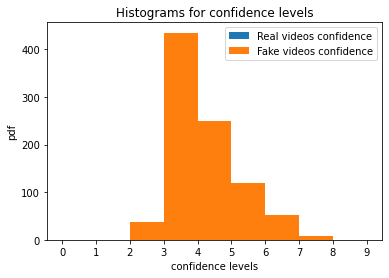

In [34]:
fig,ax=plt.subplots(1,1)

ax.hist(ntc, bins = [0,1,2,3,4,5,6,7,8,9])
ax.hist(tamp_conf, bins = [0,1,2,3,4,5,6,7,8,9])
ax.set_title("Histograms for confidence levels")
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xlabel('confidence levels')
ax.set_ylabel('pdf')
plt.legend(['Real videos confidence', 'Fake videos confidence'])
plt.show()


In [35]:
# combining tampered and non tampered confidences

conf=[]
for i in ntc:
  conf.append(i)
for i in tamp_conf:
  conf.append(i)
len(conf)

1200

In [40]:
# true labels for tampered and non tampered videos

true_label=[1 for i in range(300)]
true_labe=[0 for i in range(900)]

y_true=true_label+true_labe
len(y_true)

1200

In [41]:
# finding threshold to classify real or fake. Checking values between 2 to 4.

threshold=[]
for i in conf:
  if i>2 and i<4:
    threshold.append(i)
print(len(threshold))
threshold.sort()

640


In [42]:
recall_metric=[]
pr=[]
for i in threshold:
  pred=[]
  for j in conf:
    if j>i:
      pred.append(1)
    else:
      pred.append(0)
  recall_metric.append(sm.recall_score(y_true, pred))
  pr.append(sm.precision_score(y_true, pred))

In [43]:
max(pr),np.argmax(pr)

(0.2608695652173913, 164)

In [44]:
threshold[354]

3.4571919441223145

In [45]:
y_pred=[]
for i in conf:
  if i>threshold[354]:
    y_pred.append(1)
  else:
    y_pred.append(0)

print(sm.accuracy_score(y_true, y_pred))
print(sm.f1_score(y_true, y_pred))
print(sm.precision_score(y_true, y_pred))
print(sm.recall_score(y_true, y_pred))   
print(sm.roc_auc_score(y_true, y_pred))
sm.confusion_matrix(y_true, y_pred)

0.4091666666666667
0.3807860262008734
0.2579881656804734
0.7266666666666667
0.515


array([[273, 627],
       [ 82, 218]])

In [46]:
y_pred=[]
for i in conf:
  if i>3.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


print(sm.accuracy_score(y_true, y_pred))
print(sm.f1_score(y_true, y_pred))
print(sm.precision_score(y_true, y_pred))
print(sm.recall_score(y_true, y_pred))   
print(sm.roc_auc_score(y_true, y_pred))
sm.confusion_matrix(y_true, y_pred)

0.41833333333333333
0.3711711711711712
0.254320987654321
0.6866666666666666
0.5077777777777777


array([[296, 604],
       [ 94, 206]])